# Analiza zbioru danych *New York Times*

Załaduj zbiór danych NYT jako DataFrame (biblioteka Pandas)

In [1]:
import pandas as pd
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values

In [2]:
df

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.000000,0.009251,0.0,0.007564,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.000000,0.000000,0.0,0.001418,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,3,art,0.016036,0.0,0.0,0.011403,0.000000,0.0,0.010063,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,4,art,0.026415,0.0,0.0,0.000000,0.000000,0.0,0.008677,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,5,art,0.007285,0.0,0.0,0.011008,0.000000,0.0,0.008390,0.0,...,0.000000,0.0,0.048151,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,music,0.006929,0.0,0.0,0.000000,0.000000,0.0,0.005600,0.0,...,0.000000,0.0,0.024425,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
98,99,music,0.111882,0.0,0.0,0.000000,0.000000,0.0,0.003716,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
99,100,music,0.006550,0.0,0.0,0.000000,0.000000,0.0,0.009301,0.0,...,0.000000,0.0,0.029686,0.015659,0.0,0.026605,0.0,0.0,0.0,0.0
100,101,music,0.009497,0.0,0.0,0.000000,0.040362,0.0,0.003070,0.0,...,0.000000,0.0,0.066953,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


Wyswietl 20 losowych wybranych elementów słownika (nagłówek)

In [3]:
import numpy as np
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['allusions' 'lisa' 't' 'filter' 'hans' 'displayed' 'w' 'days' 'would'
 'anthony' 'remembers' 'finds' 'longtime' 'cathedral' 'citys' 'garden'
 'musical' 'banks' 'exploring' 'stephen']


Dokonaj transformacji PCA pomijając kolumny, które nie reprezentują słów a jedynie metadane

In [4]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="arpack")
X_pca = pca.fit_transform(array)

Dla pierwszego komponentu wiodacego wyswietl 15 elementów o największej wartości (wraz z nazwami kolumn - słowami). Jakim słowom odpowiadaja najwieksze wartosci pierwszego komponentu wiodacego?

In [5]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=True
    )[:15]))[0]

for i in indices:
    print(i, header[i])

3530 she
1794 her
2517 ms
1875 i
3394 said
2498 mother
875 cooper
2538 my
2761 painting
3013 process
2762 paintings
1899 im
2516 mrs
1771 he
2373 me


Największe wartości pierwszego komponentu odpowiadają słowom często występującym w języku, takim jak zaimki, które jednak nie wnoszą dużej wartości, jeśli chodzi o znaczenie.

---

Dla pierwszego komponentu wiodacego wyswietl 15 elementów o najmniejszej
wartosci (wraz z nazwami kolumn - słowami). Jakim słowom
odpowiadaja najmniejsze wartosci pierwszego komponentu wiodacego?

In [6]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[0])),
    key=lambda x: x[1], reverse=False
    )[:15]))[0]

for i in indices:
    print(i, header[i])

2529 music
4099 trio
3963 theater
2707 orchestra
799 composers
2691 opera
3964 theaters
2300 m
3032 program
2905 players
1457 festival
1202 east
4401 y
2059 jersey
3898 symphony


Najmniejsze wartości pierwszego komponentu odpowiadają słowom charakterystycznym dla dziedzin, których dotyczą artykuły z analizowanego zbioru (np. *music* lub *theater*). Poza tym pojawiają się tu także "literówli" ("m", "y").

---

Powtórz eksperyment dla drugiego komponentu wiodacego. Skomentuj
uzyskane wyniki.

In [7]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=True
    )[:15]))[0]

for i in indices:
    print(i, header[i])

1794 her
3530 she
3963 theater
2691 opera
2517 ms
1875 i
1851 hour
3408 sang
3022 production
1457 festival
2529 music
2530 musical
3665 songs
2707 orchestra
4233 vocal


In [8]:
indices = list(zip(*sorted(
    list(enumerate(pca.components_[1])),
    key=lambda x: x[1], reverse=False
    )[:15]))[0]

for i in indices:
    print(i, header[i])

235 art
2527 museum
1901 images
244 artists
1139 donations
2528 museums
2761 painting
3922 tax
2762 paintings
3450 sculpture
1606 gallery
3451 sculptures
2757 painted
4315 white
3502 service


**Komentarz**:

Listy elementów sugerują, że pierwszy komponent wiodący, który pokazuje największą zmienność, zawiera cechy, które nie najlepiej różnicują artykuły z dwóch kategorii. Wynika to stąd, że ten komponent skupił się głównie na słowach, które są powszechnie używane w języku angielskim (takie jak zaimki).

Elementy z drugiego komponentu wiodącego lepiej rozgraniczyły słowa z artykułów o muzyce i o sztuce.

---

Dokonaj wizualizacji wektorów cech zrzutowanych na 2(3) pierwsze komponenty
wiodace. Zaznacz dwie klasy (art, music) oddzielnymi kolorami

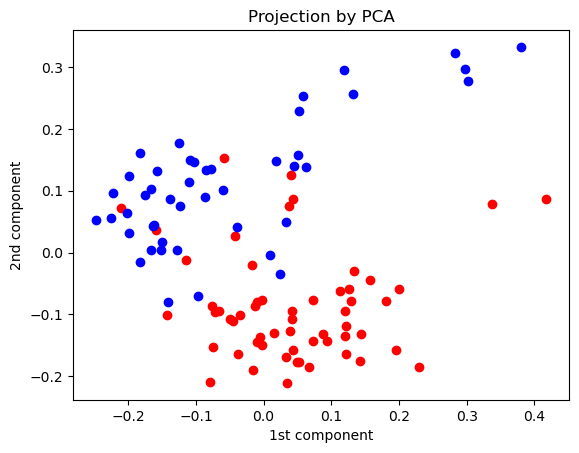

In [9]:
reds = df['class.labels'] == 'art'
blues = df['class.labels'] == 'music'

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

Narysuj wykres zaleznosci wartosci wariancji od numeru kierunku wiodacego
k. Jaka czesc wariancji zostaje zachowana po wykonaniu projekcji
na pierwsze 10 komponentów wiodacych?

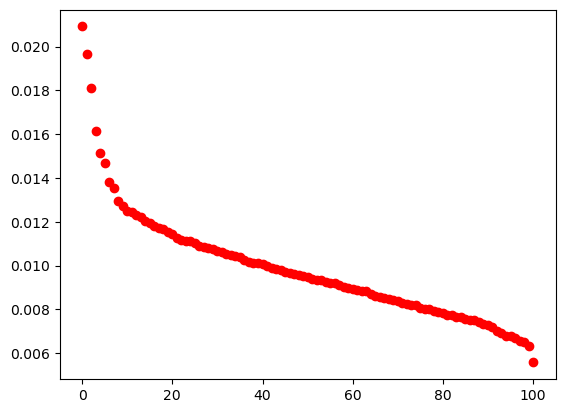

0.15773478029003488


In [10]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

# Analiza zbioru danych 04Cars

Załaduj zbiór danych 04Cars jako DataFrame (biblioteka Pandas) i odfiltruj 11 ostatnich kolumn - zostana one uzyte jako wejscie dla PCA.

In [11]:
df_cars = pd.read_csv('./04cars-data.csv')
atributes= list(df_cars.columns.values[-11:])
data_cars = df_cars.iloc[:,-11:]
array_cars = data_cars.values

In [12]:
atributes

['Retail Price',
 'Dealer Cost',
 'Engine Size (l)',
 'Cyl',
 'HP',
 'City MPG',
 'Hwy MPG',
 'Weight',
 'Wheel Base',
 'Len',
 'Width']

In [13]:
data_cars

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...
382,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,35145,33112,2.5,5,208,20,27,3823,109,186,73


In [14]:
data_cars.describe()

,Retail Price,Dealer Cost,Engine Size (l),Cyl,HP,City MPG,Hwy MPG,Weight,Wheel Base,Len,Width
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,33231.180879,30440.653747,3.127390,5.757106,214.444444,20.312661,27.263566,3532.457364,107.211886,184.961240,71.276486
std,19724.634576,17901.179282,1.014314,1.490182,70.262822,5.262333,5.636005,706.003622,7.086553,13.237999,3.368329
min,10280.000000,9875.000000,1.400000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000,64.000000
25%,20997.000000,19575.000000,2.300000,4.000000,165.000000,18.000000,24.000000,3107.000000,103.000000,177.000000,69.000000
50%,28495.000000,26155.000000,3.000000,6.000000,210.000000,19.000000,27.000000,3469.000000,107.000000,186.000000,71.000000
75%,39552.500000,36124.000000,3.800000,6.000000,250.000000,21.500000,30.000000,3922.000000,112.000000,193.000000,73.000000
max,192465.000000,173560.000000,6.000000,12.000000,493.000000,60.000000,66.000000,6400.000000,130.000000,221.000000,81.000000


In [15]:
array_cars

array([[4.3755e+04, 3.9014e+04, 3.5000e+00, ..., 1.1500e+02, 1.9700e+02,
        7.2000e+01],
       [4.6100e+04, 4.1100e+04, 3.5000e+00, ..., 1.1500e+02, 1.9700e+02,
        7.2000e+01],
       [3.6945e+04, 3.3337e+04, 3.5000e+00, ..., 1.0600e+02, 1.8900e+02,
        7.7000e+01],
       ...,
       [2.6135e+04, 2.4641e+04, 1.9000e+00, ..., 1.0100e+02, 1.8000e+02,
        6.8000e+01],
       [3.5145e+04, 3.3112e+04, 2.5000e+00, ..., 1.0900e+02, 1.8600e+02,
        7.3000e+01],
       [4.1250e+04, 3.8851e+04, 2.9000e+00, ..., 1.1300e+02, 1.8900e+02,
        7.5000e+01]])

Znormalizuj dane, zapewniajac, ze dla kazdej cechy srednia arytmetyczne
wynosi 0, a wariancja 1.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
array_norm = scaler.fit_transform(data_cars)

Dokonaj transformacji PCA dla wejsciowego zbioru danych, a nastepnie
przedstaw zaleznosc bezwzglednej i wzglednej wartosci wariancji od numeru
kierunku wiodacego k. Jaka czesc wariancji zostaje zachowana przy
redukcji wymiarowosci do 2 i 3

In [17]:
pca = PCA()
X_pca = pca.fit_transform(array_norm)

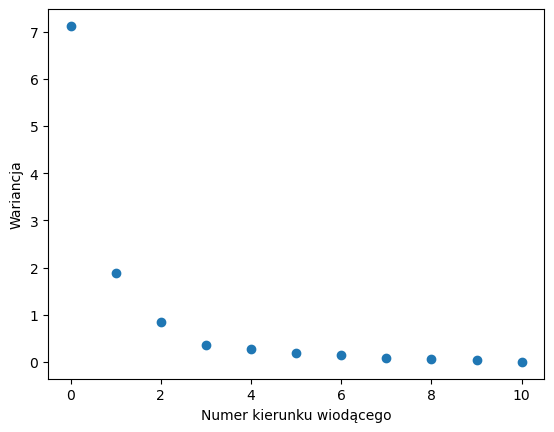

In [18]:
plt.scatter(np.arange(11), pca.explained_variance_)
plt.xlabel("Numer kierunku wiodącego")
plt.ylabel("Wariancja")
plt.show()

In [19]:
variance_retained_2d = np.sum(pca.explained_variance_ratio_[:2])
variance_retained_3d = np.sum(pca.explained_variance_ratio_[:3])

print("Wariancja zachowana przy redukcji wymiarów do 2:", variance_retained_2d)
print("Wariancja zachowana przy redukcji wymiarów do 3:", variance_retained_3d)

Wariancja zachowana przy redukcji wymiarów do 2: 0.8171421089701892
Wariancja zachowana przy redukcji wymiarów do 3: 0.8943901348942342


Wyswietl wartosci elementów pierwszego i drugiego komponentu wiodacego
wraz z odpowiadajaca im nazwa cechy. Co oznaczaja elementy o
wartosci bliskiej zeru? Z jakimi własnosciami samochodu wiaza sie:
- Najwieksze elementy pierwszego komponentu wiodacego
- Najmniejsze elementy pierwszego komponentu wiodacego
- Najwieksze elementy drugiego komponentu wiodacego
- Najmniejsze elementy drugiego komponentu wiodacego

In [20]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print('Attribute, PC1, PC2')
for i in range(0,pc1.shape[0]):
    print(atributes[i] + ':' + repr(pc1[i]) + ':' + repr(pc2[i]))

Attribute, PC1, PC2
Retail Price:-0.2637504434440343:0.46850869750253904
Dealer Cost:-0.2623186387530952:0.47014658513822605
Engine Size (l):-0.3470804920252009:-0.015347186463713492
Cyl:-0.3341887576286372:0.07803201087501874
HP:-0.31860225848402934:0.29221347613918247
City MPG:0.31048172673231283:-0.0033659357616592765
Hwy MPG:0.3065886385804444:-0.010964460145348666
Weight:-0.33632936694048793:-0.1674635715478704
Wheel Base:-0.26621003357105427:-0.4181771069592043
Len:-0.2567901876706822:-0.40841138066875476
Width:-0.2960545914170611:-0.31289135016250724


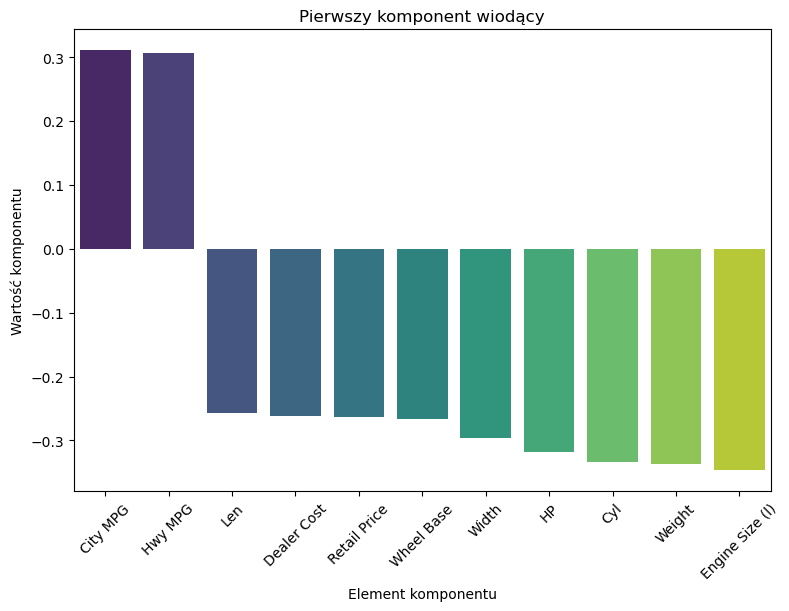

In [21]:

import seaborn as sns
plt.figure(figsize=(9,6))
sns.barplot(x=atributes, y = pca.components_[0], order=np.array(atributes)[np.argsort(pca.components_[0])[::-1]],palette="viridis")
plt.xlabel('Element komponentu')
plt.xticks(rotation=45)
plt.ylabel('Wartość komponentu')
plt.title('Pierwszy komponent wiodący')
plt.show()

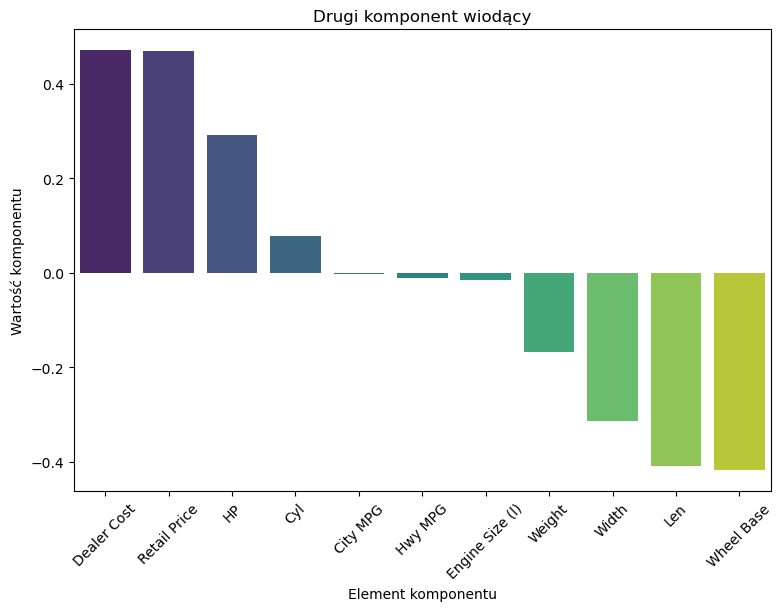

In [22]:
import seaborn as sns
plt.figure(figsize=(9,6))
sns.barplot(x=atributes, y = pca.components_[1], order=np.array(atributes)[np.argsort(pca.components_[1])[::-1]],palette="viridis")
plt.xlabel('Element komponentu')
plt.xticks(rotation=45)
plt.ylabel('Wartość komponentu')
plt.title('Drugi komponent wiodący')
plt.show()

Elementy o wartościach bliskich zeru wskazują, że te cechy mają niewielki wpływ na dany komponent wiodący. Wartości najbliższe zeru dla drugiego komponentu wiodącego odpowiadają zużyciu paliwa w miescie i na autostradzie, co oznacza, że nie można jednoznacznie różnicować samochodów na podstawie tylko tych dwóch cech.

Największe elementy pierwszego komponentu wiodącego są związane z cechami takim jak: rozmiar silnika, liczba cylindrów czy masa, a więc odnoszą się do parametów technicznych aut.

Najmniejsze elementy pierwszego komponentu wiodącego są związane z cechami takim jak: cena detaliczna, cena dla dealera, długość, rozstaw osi.

Największe elementy drugiego komponentu wiodącego są związane z cechami takim jak: cena detaliczna i cena dla dealera. Są to jedne z ważniejszych cech przy różnicowaniu samochodów.

Najmniejsze elementy drugiego komponentu wiodącego są związane z cechami takim jak: zużycie paliwa w mieście i na autostradzie.

Dokonaj wizualizacji wektorów cech zrzutowanych na 2(3) pierwsze komponenty
wiodace. Nanies tekst z modelem samochodu na wykres. Jakie
typy samochodów wystepuja w poszczególnych czesciach wykresu?

[]

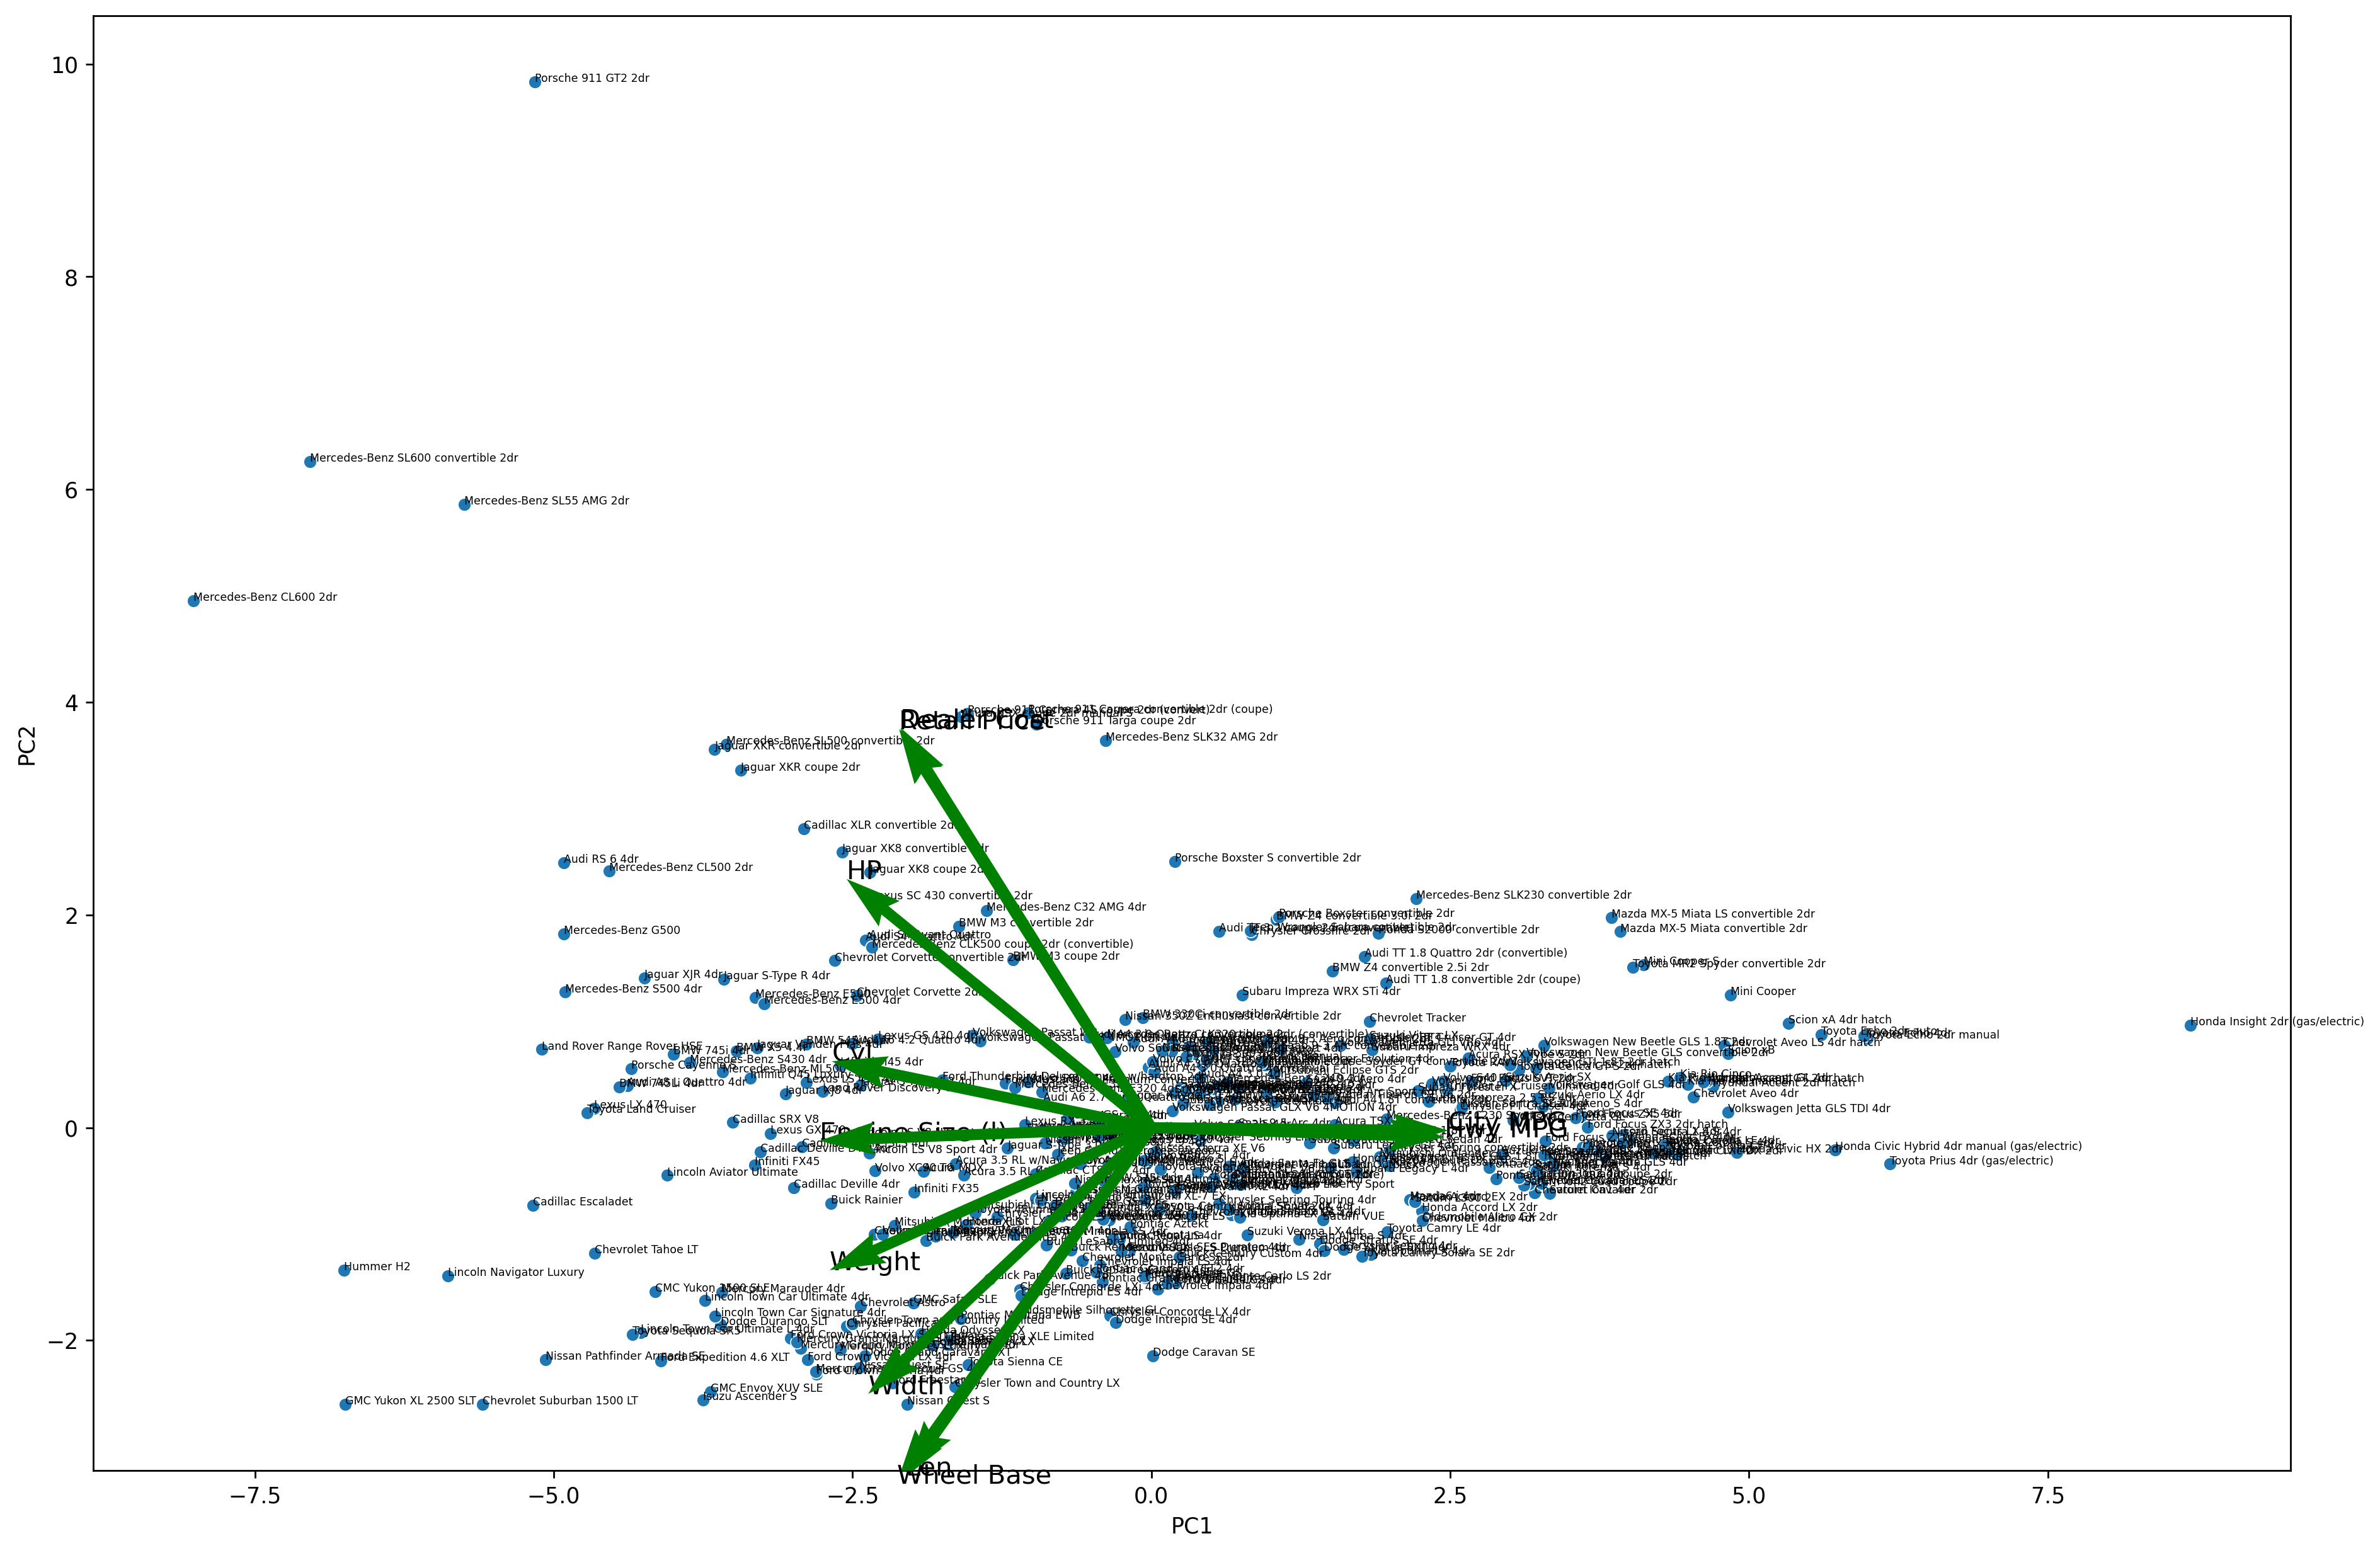

In [23]:
plt.figure(figsize=(18,12))
sp = sns.scatterplot(x=X_pca[...,0], y=X_pca[...,1])

for idx in range(0, X_pca.shape[0]):
    sp.text(X_pca[idx,0], X_pca[idx, 1],
            df_cars['Vehicle Name'][idx],
            size=5, color='black')
    
directions = pca.components_[:2,:] @ np.identity(len(atributes))*8

sp.quiver(
    np.zeros_like(directions[0,:]), 
    np.zeros_like(directions[1,:]),
    directions[0,:],
    directions[1,:],
    angles='xy',
    scale_units='xy',
    scale=1,
    color='green',
    width=0.005,
    zorder=20)

for i, txt in enumerate(atributes):
    plt.text(directions[0,i], directions[1,i], txt, fontsize=12,color='black')
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gcf().set_dpi(250)
plt.plot()

Największe skupisko samochodów występuje w centralnej części wykresu i reprezentuje samochody średniej klasy. Dużo samochodów znajduje się również na prawo od centrum i są to samochody bardziej ekonomiczne. W prawej górnej części wykresu znajdują się głównie droższe samochody sportowe. Z kolei lewa górna część wyresu odpowiada również samochodom z wyższej półki cenowej, ale mniej ekonomicznym, z większą mocą silnika i większym spalaniem. Lewa dolna część wykresu reprezentuje samochody nieco mniej luksusowe, ale nieekonomiczne (o dużych rozmiarach i dużym spalaniu).

Na tym samym wykresie w 2D przedstaw zbiór danych o zredukowanym
rozmiarze wraz z wizualicacja cech zrzutowanych na 2 pierwsze komponenty
wiodace. Co pokazuje tego typu wizualizacja?

[]

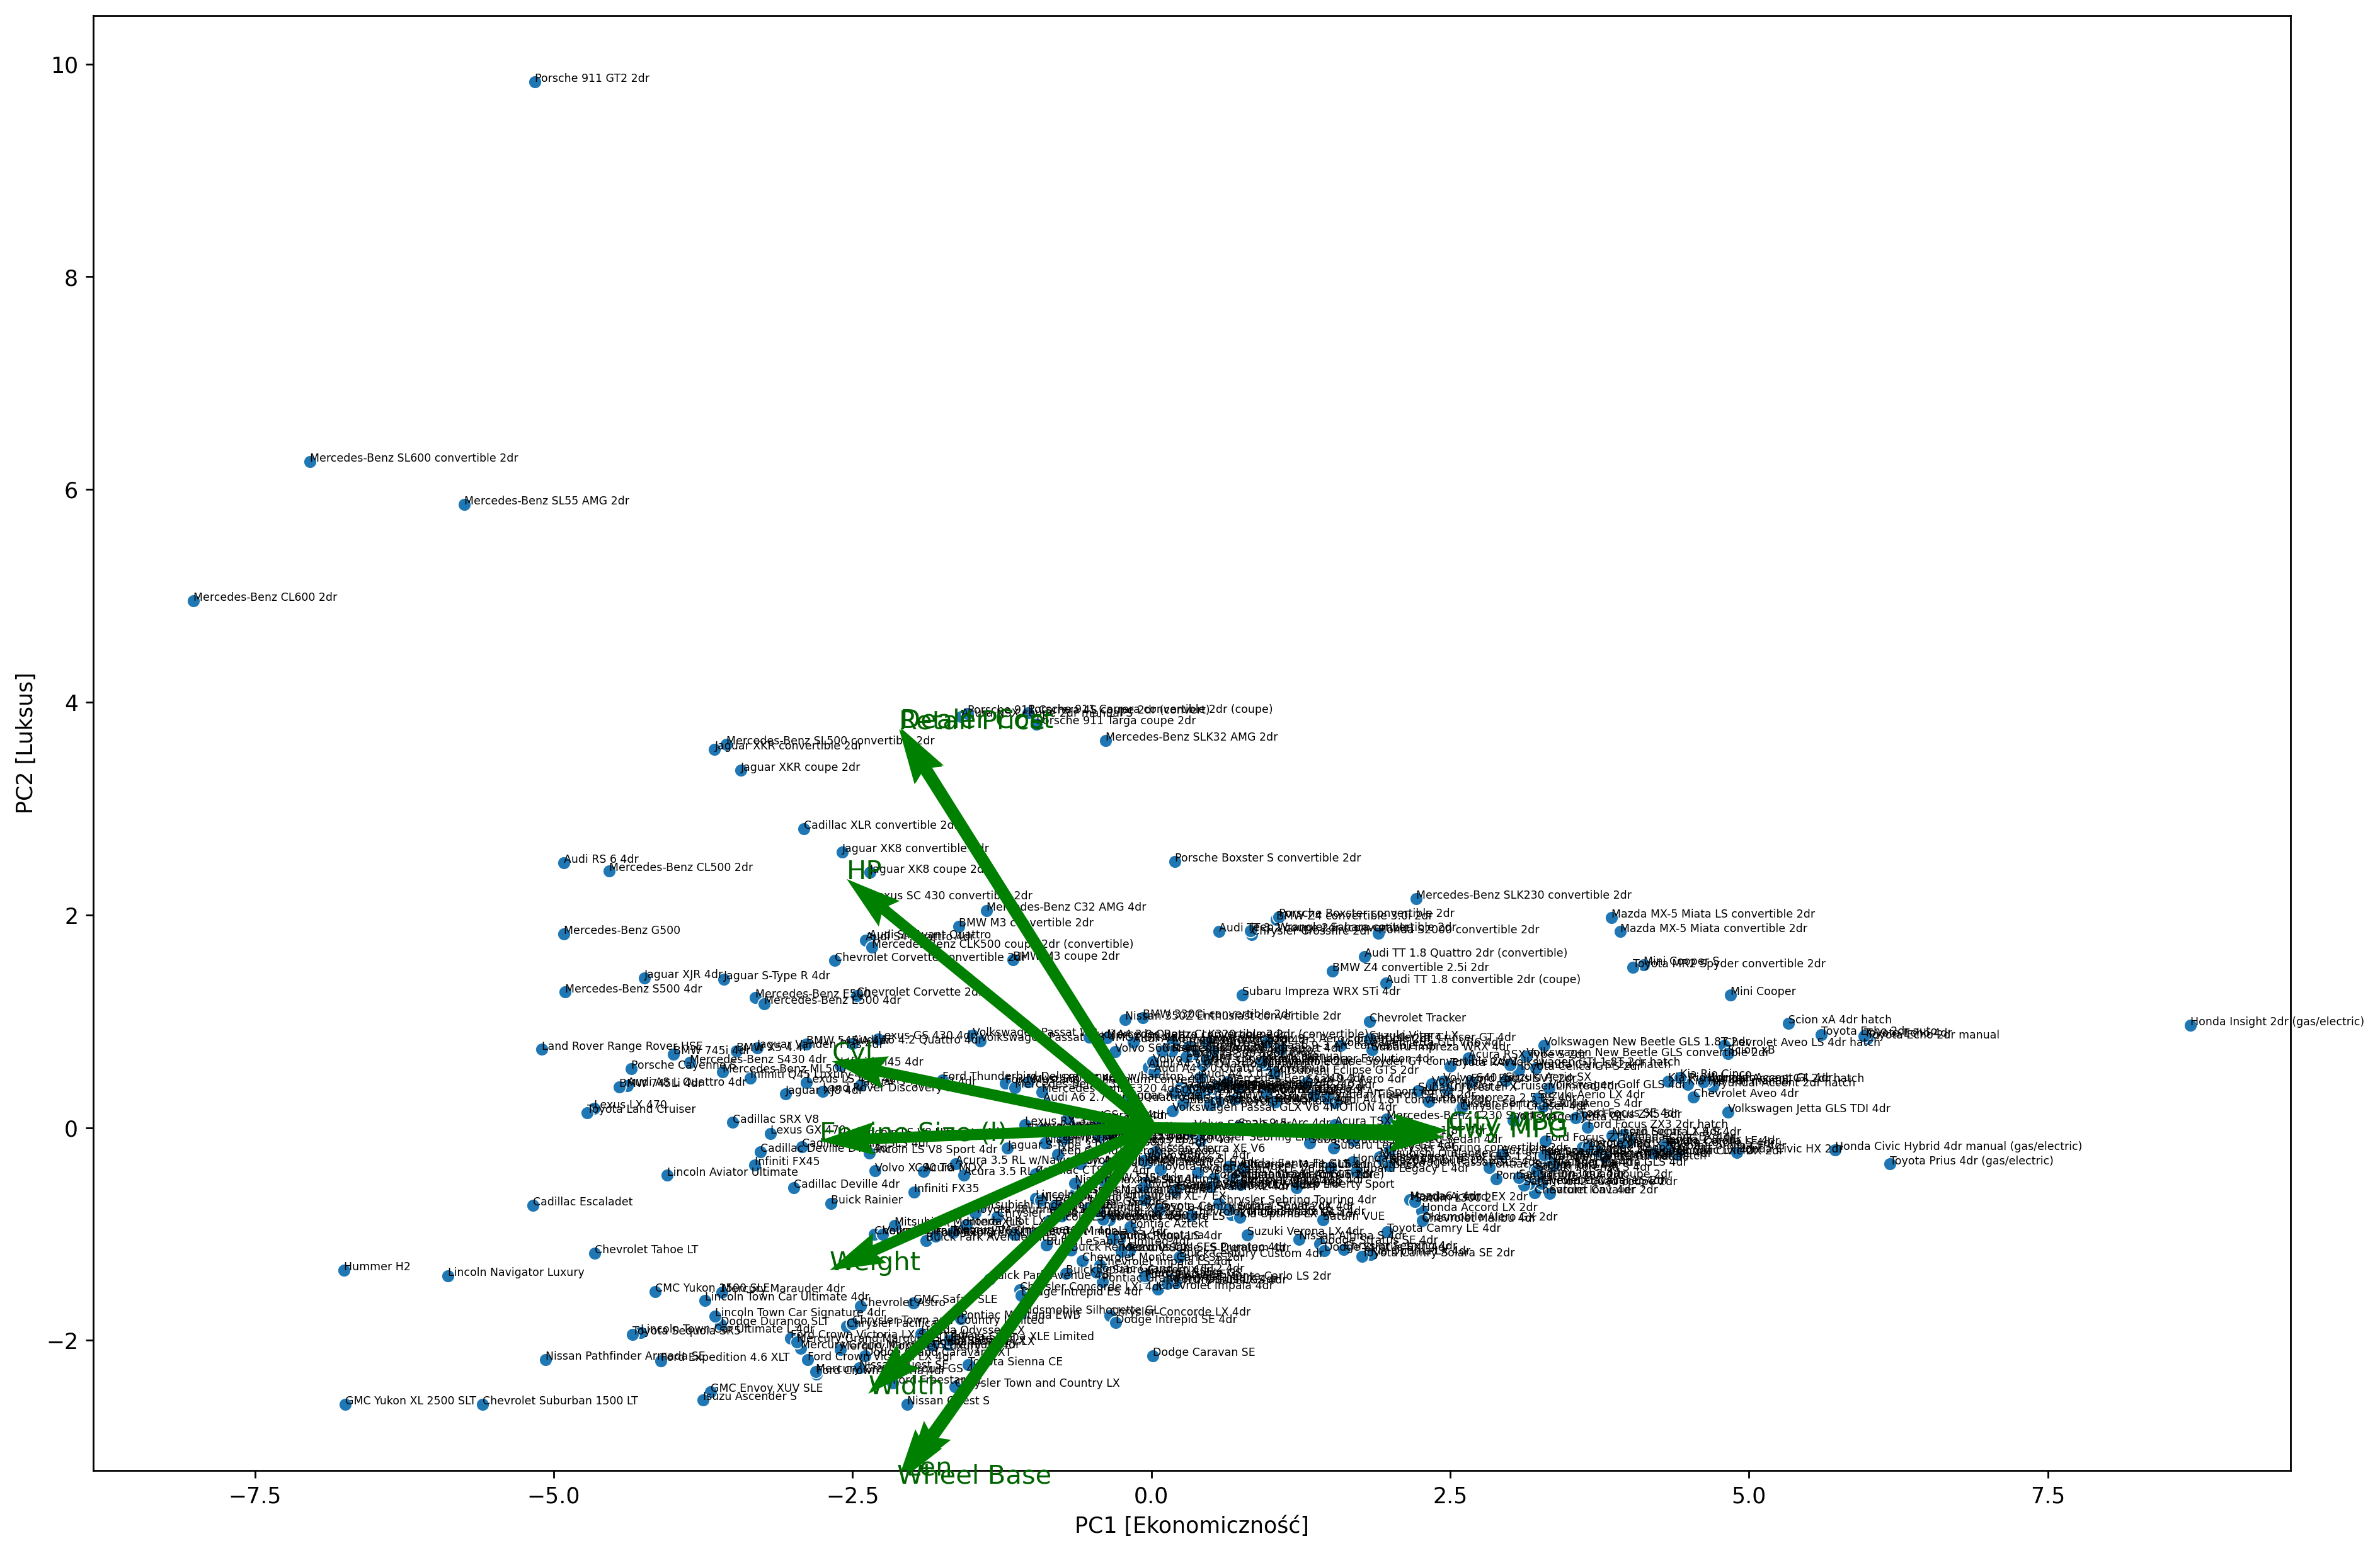

In [24]:
plt.figure(figsize=(18,12))
sp = sns.scatterplot(x=X_pca[...,0], y=X_pca[...,1])

for idx in range(0, X_pca.shape[0]):
    sp.text(X_pca[idx,0], X_pca[idx, 1], df_cars['Vehicle Name'][idx], size=5, color='black')
    
directions = pca.components_[:2,:] @ np.identity(len(atributes))*8
sp.quiver(np.zeros_like(directions[0,:]), np.zeros_like(directions[1,:]), directions[0,:], directions[1,:], angles='xy', scale_units='xy', scale=1, color='green', width=0.005, zorder=20)

for i, txt in enumerate(atributes):
    plt.text(directions[0,i], directions[1,i], txt, fontsize=12,color='darkgreen')
    
plt.xlabel("PC1 [Ekonomiczność]")
plt.ylabel("PC2 [Luksus]")
plt.gcf().set_dpi(250)
plt.plot()

Tego typu wizualizacja pozwala zrozumieć związki między obserwacjami (samochodami) a cechami w dwuwymiarowej przestrzeni PCA. Można zauważyć, że punkty bliżej siebie reprezentują samochody o podobnych cechach, a punkty dalej od siebie są bardziej różnorodne. Strzałki reprezentują kierunki, w których wartości cech rosną najszybciej. Im dłuższa strzałka, tym więszy wpływ na zmienność danych ma odpowiadająca jej cecha. Jeśli punkty skupiają się wokół danej cechy lub strzałka wskazuje w stronę danej cechy, oznacza to, że ta cecha jest istotna dla różnic między samochodami.

# Budowa eigenfaces w oparciu o zbiór danych LFW

Korzystajac z biblioteki SciKit Learn wczytaj podzbiór zbioru danych
LFW składajacy sie z osób reprezentowanych przez co najmniej 50 róznych
zdjec (fetch lfw people()). W ten sposób otrzymasz zbiór zdjec
12 róznych osób.

In [25]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=50)

Podziel otrzymany zbiór danych na czesc treningowa i testowa (0.7, 0.3)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size=0.3, random_state=42)

Dla zbioru treningowego, oblicz PCA i opierajac sie na otrzymanych
w ten sposób 100 pierwszych komponentach głównych dokonaj redukcji
wymiarowosci do 100 dla zbioru treningowego i testowego.

In [27]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Korzystajac ze zbioru treningowego o zredukowanej wymiarowosci, wytrenuj
dwa wybrane modele klasyfikacji (np. MLP, SVM) oraz oblicz
dokładnosc klasyfikacji uzyskana dla kazdej z 12 klas na zbiorze testowym.
Zamiesc w raporcie uzyskane wartosci: precision, recall, f1-score.
Jak zmieniaja sie uzyskane wyniki w przypadku redukcji do 50 wymiarów?
Wybierz optymalna wymiarowosc w oparciu o scree plot.

Trenowanie dla 100 wymiarów


In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

mlp_classifier = MLPClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

mlp_classifier.fit(X_train_pca, y_train)
svm_classifier.fit(X_train_pca, y_train)

mlp_predictions = mlp_classifier.predict(X_test_pca)
svm_predictions = svm_classifier.predict(X_test_pca)

print("Raport klasyfikacji dla MLP:")
print(classification_report(y_test, mlp_predictions))

print("Raport klasyfikacji dla SVM:")
print(classification_report(y_test, svm_predictions))

c:\Users\katar\miniconda3\envs\conda-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Raport klasyfikacji dla MLP:
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.91      0.88      0.89        77
           2       0.68      0.72      0.70        32
           3       0.86      0.88      0.87       162
           4       0.72      0.70      0.71        30
           5       0.75      0.57      0.65        21
           6       0.78      0.41      0.54        17
           7       0.82      0.82      0.82        17
           8       0.76      0.84      0.80        19
           9       0.67      0.77      0.71        13
          10       0.92      0.92      0.92        13
          11       0.69      0.80      0.74        46

    accuracy                           0.80       468
   macro avg       0.77      0.75      0.75       468
weighted avg       0.81      0.80      0.80       468

Raport klasyfikacji dla SVM:
              precision    recall  f1-score   support

           0       0

Redukcja do 50 wymiarów

In [29]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Trenowanie dla 50 wymiarów

In [30]:
mlp_classifier = MLPClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

mlp_classifier.fit(X_train_pca, y_train)
svm_classifier.fit(X_train_pca, y_train)

mlp_predictions = mlp_classifier.predict(X_test_pca)
svm_predictions = svm_classifier.predict(X_test_pca)

print("Raport klasyfikacji dla MLP:")
print(classification_report(y_test, mlp_predictions))

print("Raport klasyfikacji dla SVM:")
print(classification_report(y_test, svm_predictions))

Raport klasyfikacji dla MLP:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.88      0.84      0.86        77
           2       0.59      0.62      0.61        32
           3       0.84      0.86      0.85       162
           4       0.56      0.50      0.53        30
           5       0.67      0.67      0.67        21
           6       0.86      0.35      0.50        17
           7       0.71      0.71      0.71        17
           8       0.67      0.63      0.65        19
           9       0.86      0.92      0.89        13
          10       0.79      0.85      0.81        13
          11       0.69      0.80      0.74        46

    accuracy                           0.76       468
   macro avg       0.72      0.70      0.70       468
weighted avg       0.77      0.76      0.76       468

Raport klasyfikacji dla SVM:
              precision    recall  f1-score   support

           0       0

c:\Users\katar\miniconda3\envs\conda-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Redukcja wymiarów do 50 pogarsza wyniki klasyfikacji.

Scree plot

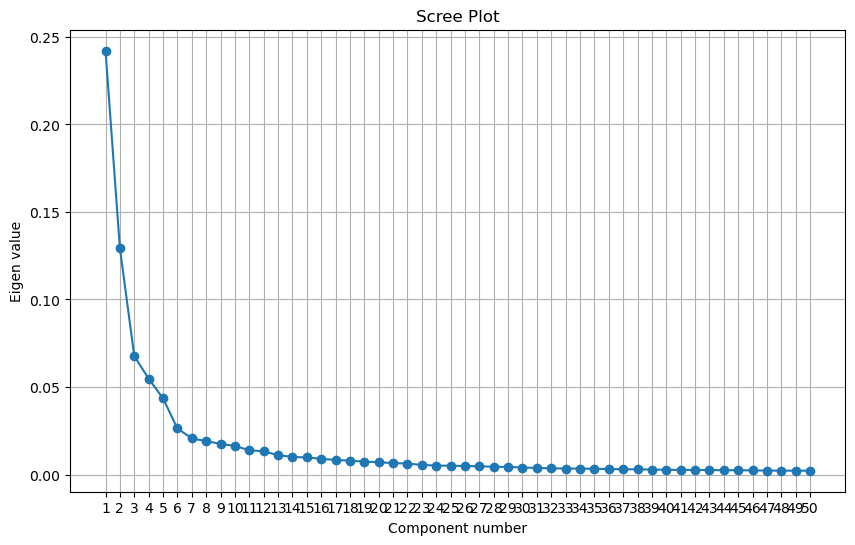

In [31]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Component number')
plt.ylabel('Eigen value')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

Poszukiwanie optymalnej wymiarowości

In [32]:
pca = PCA(n_components=122)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [33]:
mlp_classifier = MLPClassifier(random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)

mlp_classifier.fit(X_train_pca, y_train)
svm_classifier.fit(X_train_pca, y_train)

mlp_predictions = mlp_classifier.predict(X_test_pca)
svm_predictions = svm_classifier.predict(X_test_pca)

print("Raport klasyfikacji dla MLP:")
print(classification_report(y_test, mlp_predictions))

print("Raport klasyfikacji dla SVM:")
print(classification_report(y_test, svm_predictions))

Raport klasyfikacji dla MLP:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.86      0.90      0.88        77
           2       0.66      0.72      0.69        32
           3       0.87      0.90      0.88       162
           4       0.74      0.77      0.75        30
           5       0.94      0.71      0.81        21
           6       0.89      0.47      0.62        17
           7       0.68      0.76      0.72        17
           8       0.79      0.79      0.79        19
           9       0.79      0.85      0.81        13
          10       1.00      0.85      0.92        13
          11       0.85      0.89      0.87        46

    accuracy                           0.83       468
   macro avg       0.82      0.77      0.79       468
weighted avg       0.83      0.83      0.83       468

Raport klasyfikacji dla SVM:
              precision    recall  f1-score   support

           0       0

c:\Users\katar\miniconda3\envs\conda-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Optymalną wymiarowość uzyskano dla 122 komponentów, choć wyniki są tylko nieznacznie lepsze niż w przypadku 100 komponentów.

Wyswietl 20 pierwszych komponentów głównych (po uprzednim przeskalowaniu)
w formie obrazu w skali szarosci (eigenfaces). W jaki sposób
mozna zinterpretowac działanie eigenfaces w kontekscie redukcji wymiarowosci
wczesniej nie widzianego zdjecia (przykładu testowego)? Jakie
cechy ekstrahuja poszczególe eigenfaces?

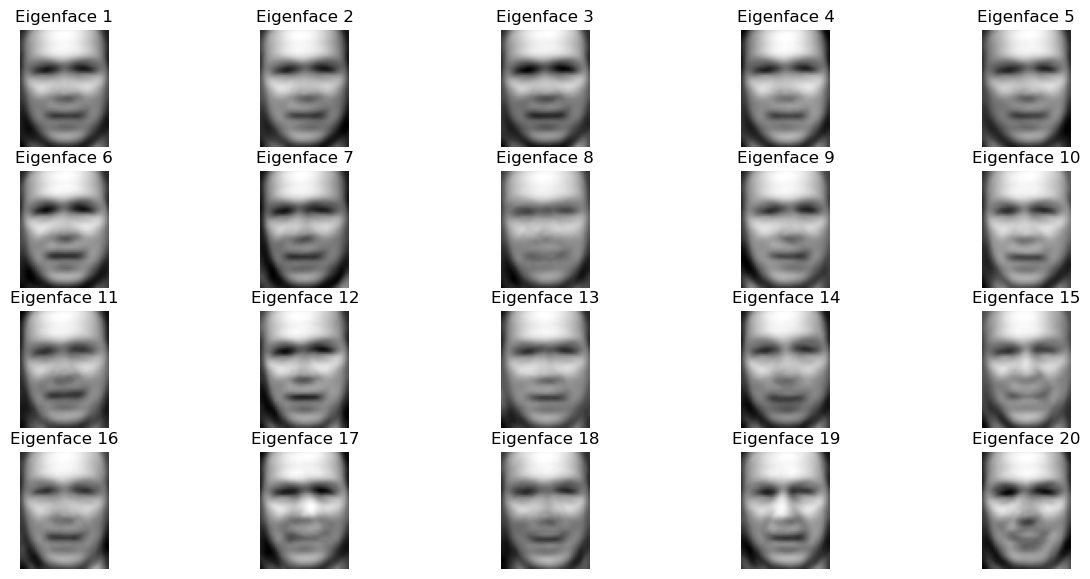

In [38]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

scaled_eigenfaces = pca.inverse_transform(np.eye(100))
plt.figure(figsize=(15, 7))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(scaled_eigenfaces[i].reshape((62, 47)), cmap='gray') 
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')
plt.show()

Pierwsze 10 eigenfaces wyodrębnia bardzo ogólne cech twarzy. Widać przede wszystkim zarys oczodołow oraz ust, wszystkie twarze są do siebie dośc podobne. Kolejne 10 eigenfaces przedstawia już bardziej szczególowe cechy. Można zauważyć różnice w kształcie i rozmieszczeniu oczu oraz ust na poszczególnych zdjęciach.